# Career Foundry Exercise 4.9 Part 2
#### Gabriel Pollicar, November 30, 2023

### _________________________________________________________________

## Contents List:

### - Importing Libraries and Datasets

### - Task 5 and 6 Profiling Variables and Creating Visuals
#### 1. Profiles based on Income 
#### 2. Department goods
#### 3. Number of dependents
#### 4. Day of week and time of orders

### - Task 7 Aggregating Max, Mean, and Min Variables on Customer Profiles

### - Task 8 Comparing Customer Profiles with Regions and Departments

### _________________________________________________________________


## Importing Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

## Importing Datasets

In [3]:
# Importing the final Active Customers Dataset from Part I

path3 = r'C:\Users\polli\Career Foundry Python'
ords_prods_cust = pd.read_pickle(os.path.join(path3, 'Exercise 4.10','02 Data', 'Active Customers Dataset.pkl'))

In [ ]:
# Removing these columns to help keep memory low, 
## These columns have been integrated into a Profile column in Part I and are no longer necessary for analysis in this page. 
columns1 = ['State', 'Age', 'fam_status']

ords_prods_cust.drop(columns1, axis=1, inplace=True)
ords_prods_custs = ords_prods_cust


In [7]:
# Code to help display .describe() number outputs in standard form 
pd.options.display.float_format = '{:.0f}'.format

# Shows the head of imported dataset
ords_prods_custs.head()

,product_id,product_name,department_id,prices,orders_day_of_week,order_time(hour),loyalty_flag,Average_Spent,Spending_Flag,order_frequency_flag,n_dependants,income,Region,Profile
0,1,Chocolate Sandwich Cookies,19,5.8,6,11,Regular customer,6.935811,Low_spender,Frequent customer,1,49620,Midwest,Old and Married
1,1,Chocolate Sandwich Cookies,19,5.8,6,17,Regular customer,6.935811,Low_spender,Frequent customer,1,49620,Midwest,Old and Married
2,907,Premium Sliced Bacon,12,20.0,5,13,Regular customer,6.935811,Low_spender,Frequent customer,1,49620,Midwest,Old and Married
3,907,Premium Sliced Bacon,12,20.0,5,14,Regular customer,6.935811,Low_spender,Frequent customer,1,49620,Midwest,Old and Married
4,1000,Apricots,10,12.9,6,12,Regular customer,6.935811,Low_spender,Frequent customer,1,49620,Midwest,Old and Married


## Task 5 and 6 Profiling Variables and Creating Visuals

### 1. Profiles based on Income

In [15]:
# This analysis looks at income column and creates profile flag based on customer income

# This code shows description of income column, specifically distribution of customer incomes 
ords_prods_custs['income'].describe()

count   30964564
mean       99676
std        43142
min        25903
25%        67292
50%        96765
75%       128102
max       593901
Name: income, dtype: float64

In [22]:
# This code creates a column called Income_Group and creates a flag of customers based on income column, 

## High income is > 120000, Middle Class customers are between 60k and 120k and Low income group is below 60k
## These figures are determined based on distribution of customer incomes shown in .describe()
ords_prods_custs.loc[ords_prods_custs['income'] < 60000, 'Income_Group'] = 'Low Income'
ords_prods_custs.loc[(ords_prods_custs['income'] >= 60000) & (ords_prods_custs['income'] <= 120000), 'Income_Group'] = 'Middle Income'
ords_prods_custs.loc[ords_prods_custs['income'] > 120000, 'Income_Group'] = 'High Income'

In [23]:
# value counts shows similar distribution of 50% middle, 25% high and low incomes which is what we expected
## from using distribution of income column. 
ords_prods_custs['Income_Group'].value_counts()

Income_Group
Middle Income    15982301
High Income       9179513
Low Income        5802750
Name: count, dtype: int64

Text(0.5, 1.0, 'Customers by Income Group')

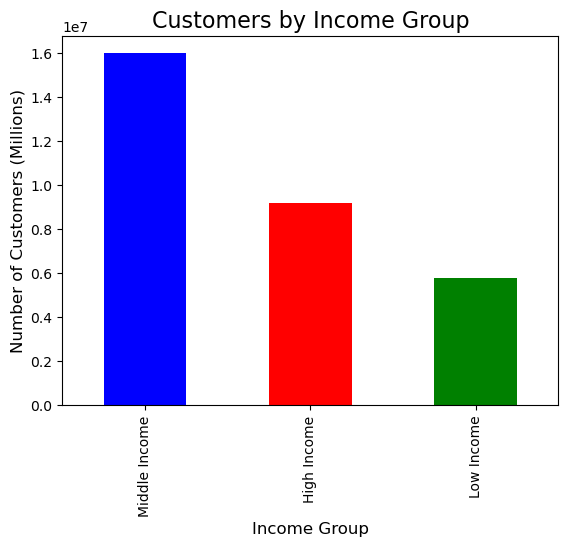

In [94]:
# This code creates a bar chart of customer amounts by income group
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'
Income_Distribution_bar = ords_prods_custs['Income_Group'].value_counts().plot.bar(color = color)


plt.xlabel("Income Group", fontdict={'fontsize' : 12})
plt.ylabel('Number of Customers (Millions)', fontdict={'fontsize' : 12})
plt.title('Customers by Income Group', fontdict={'fontsize' : 16})


In [125]:
# This code exports the bar chart figure into the Jupyter folder
Income_Distribution_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Income Distribution Bar Chart.png'))

### 2. Profiles based on Department goods

In [35]:
# This code imports a dataset of department names for each specific department id 
## This will be used to create the analysis based on department goods 
dept = pd.read_csv(os.path.join(path3, 'Exercise 4.4', '02 Data', 'departments_wrangled.csv'))
dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [45]:
# This code merges the department data with the original large dataset based on department_id
ords_prods_custs = ords_prods_custs.merge(dept, on = 'department_id')

In [135]:
# Value_counts shows all rows accounted for with a specific department name
ords_prods_custs['department'].value_counts(dropna = False).sum()

30959687

Text(0.5, 1.0, 'Amount of Orders by Department')

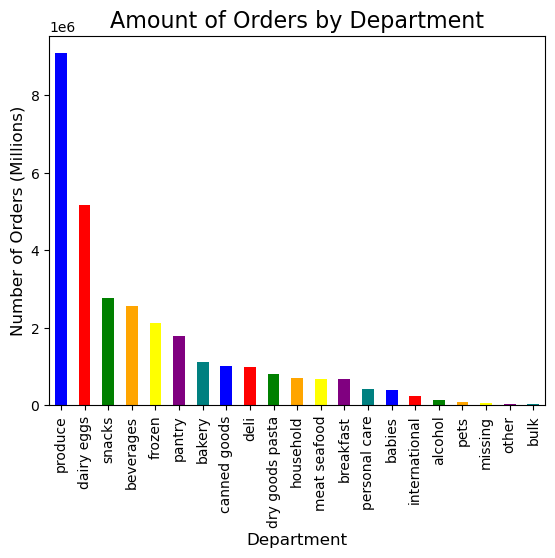

In [95]:
# This code creates a bar chart based on number of orders for each department name. 
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'
Ordersby_Department_bar = ords_prods_custs['department'].value_counts().plot.bar(color = color)


plt.xlabel("Department", fontdict={'fontsize' : 12})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 12})
plt.title('Amount of Orders by Department', fontdict={'fontsize' : 16})

In [133]:
# This code exports the bar chart figure into the Jupyter folder
Ordersby_Department_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Department Distribution Bar Chart.png'))

### 3. Number of dependents

In [39]:
# This code creates a customer profile column called dependants_group
# This flag determines if an order has been made from a customer with dependants or not. 
ords_prods_custs.loc[ords_prods_custs['n_dependants'] == 0, 'dependants_group'] = 'No dependants'
ords_prods_custs.loc[ords_prods_custs['n_dependants'] > 0, 'dependants_group'] = 'Has dependants'

In [134]:
# Value_counts shows all rows accounted for with each specific dependent flag
ords_prods_custs['dependants_group'].value_counts(dropna = False).sum()

30959687

Text(0.5, 1.0, 'Total Orders based on Existing Dependants')

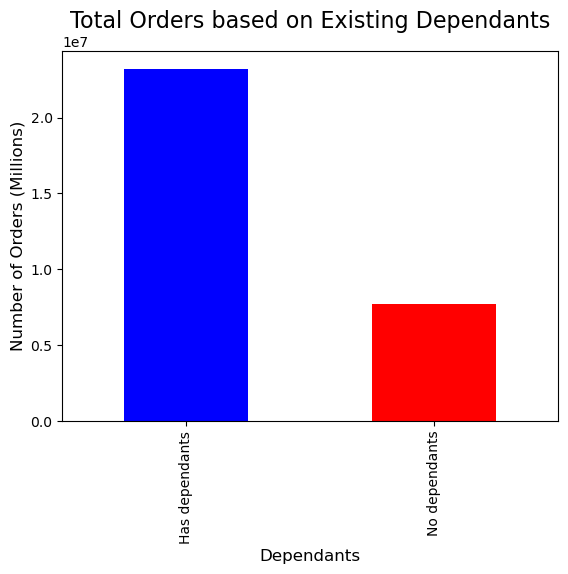

In [143]:
# This code creates a visual for the dependents flag 
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'
Customersby_Dependants_bar = ords_prods_custs['dependants_group'].value_counts().plot.bar(color = color)


plt.xlabel("Dependants", fontdict={'fontsize' : 12})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 12})
plt.title('Total Orders based on Existing Dependants', fontdict={'fontsize' : 16})

In [140]:
# This code exports the bar chart figure into the Jupyter folder
Customersby_Dependants_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Existing Dependants Bar Chart.png'))

### 4. Day of week and time of orders

In [41]:
# This creates a new column orders_day_of_week which creates a category of each order as either a weekday order or weekend order
# Days 1-5 are considered weekday and 6-7 are weekends
ords_prods_custs.loc[ords_prods_custs['orders_day_of_week'] <= 5, 'WorkWeek'] = 'Weekday'
ords_prods_custs.loc[ords_prods_custs['orders_day_of_week'] > 5, 'WorkWeek'] = 'Weekend'

In [147]:
# The value counts shows that all columns have no missing values, all orders have been attributed 
ords_prods_custs['WorkWeek'].value_counts(dropna = False)

WorkWeek
Weekday    26668954
Weekend     4290733
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Orders during Weekends vs Weekdays')

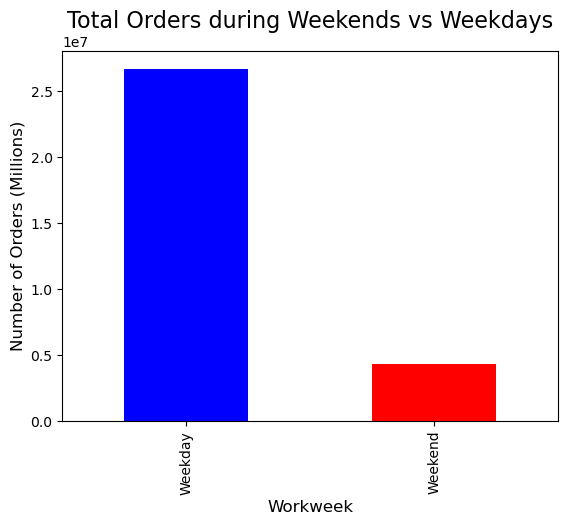

In [99]:
# This dataset creates a new bar char showing orders based on weekend vs weekdays, 
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'
Ordersby_Workweek_bar = ords_prods_custs['WorkWeek'].value_counts().plot.bar(color = color)


plt.xlabel("Workweek", fontdict={'fontsize' : 12})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 12})
plt.title('Total Orders during Weekends vs Weekdays', fontdict={'fontsize' : 16})

In [149]:
# This code exports the bar chart figure into the Jupyter folder
Ordersby_Workweek_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Orders by Weekday-end Bar Chart.png'))

In [48]:
# This code creates a smaller subset to help with memory issues for creating the remaining visualizations
# A new dataset is made ords_prods_custs2
columns1 = ['department_id', 'product_id', 'n_dependants', 'income']

ords_prods_custs2.drop(columns1, axis=1, inplace=True)
ords_prods_custs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   product_name          object 
 1   prices                float64
 2   orders_day_of_week    int64  
 3   order_time(hour)      int64  
 4   loyalty_flag          object 
 5   Average_Spent         float64
 6   Spending_Flag         object 
 7   order_frequency_flag  object 
 8   Region                object 
 9   Profile               object 
 10  Income_Group          object 
 11  dependants_group      object 
 12  WorkWeek              object 
 13  department            object 
dtypes: float64(2), int64(2), object(10)
memory usage: 3.2+ GB


In [56]:
# This code creates a new column called ordertime which creates a profile group for orders made during certain times of the day
# Time is split in 6 hour groups to help identify spending patterns throughout the day
ords_prods_custs.loc[(ords_prods_custs['order_time(hour)'] >= 0) & (ords_prods_custs['order_time(hour)'] <= 6), 'ordertime'] = 'Night/Early Morning'
ords_prods_custs.loc[(ords_prods_custs['order_time(hour)'] > 6) & (ords_prods_custs['order_time(hour)'] <= 12), 'ordertime'] = 'Morning'
ords_prods_custs.loc[(ords_prods_custs['order_time(hour)'] > 12) & (ords_prods_custs['order_time(hour)'] <= 18), 'ordertime'] = 'Afternoon'
ords_prods_custs.loc[(ords_prods_custs['order_time(hour)'] > 18) & (ords_prods_custs['order_time(hour)'] <= 23), 'ordertime'] = 'Evening'

In [150]:
# This value counts shows all orders have been attributed with a grouped time of day
ords_prods_custs['ordertime'].value_counts(dropna = False)

ordertime
Afternoon              13588143
Morning                12644394
Evening                 3878944
Night/Early Morning      848206
Name: count, dtype: int64

Text(0.5, 1.0, 'Orders throughout the Day')

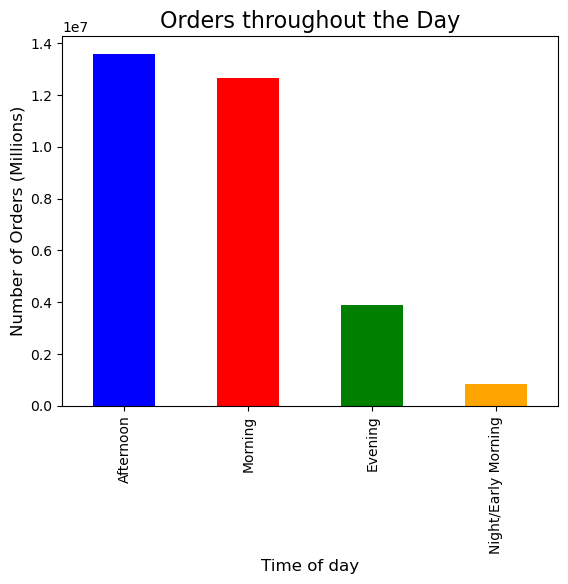

In [112]:
# This code creates a bar chart showing the total number of orders made throughout the day
Ordersby_TimeofDay_bar = ords_prods_custs['ordertime'].value_counts().plot.bar(color = color)


plt.xlabel("Time of day", fontdict={'fontsize' : 12})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 12})
plt.title('Orders throughout the Day', fontdict={'fontsize' : 16})


In [ ]:
# This code exports the bar chart figure into the Jupyter folder
Income_Distribution_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Income Distribution Bar Chart.png'))

In [120]:
# This code creates a smaller subset of the data called df_2
# df_2 holds 30% of data randomly chosen across entire dataset
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs)) <= 0.7
small = ords_prods_custs[~dev]
df_2 = small[['order_time(hour)','prices']]

In [252]:

data2 = df_2['order_time(hour)'].value_counts().rename_axis('unique_values').reset_index(name='counts')
data2.head()

,unique_values,counts
0,10,794944
1,11,782774
2,14,770309
3,13,761925
4,15,761588


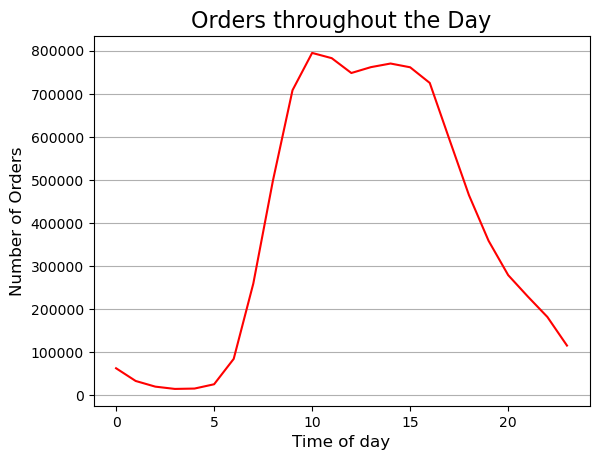

In [260]:
# This code creates a bar chart counting the number of orders made throughout the day, 
# This chart is showing only a small subset of data 
color = 'blue', 'red', 'green', 'orange', 'yellow', 'purple', 'teal'

data2 = df_2['order_time(hour)'].value_counts().rename_axis('unique_values').reset_index(name='counts')
Ordersby_Time_bar = sns.lineplot(x='unique_values', y = 'counts', data=data2, color = 'red', zorder = 3)

plt.xlabel("Time of day", fontdict={'fontsize' : 12})
plt.ylabel('Number of Orders', fontdict={'fontsize' : 12})
plt.title('Orders throughout the Day', fontdict={'fontsize' : 16})
plt.grid(axis = 'y', zorder=0)

In [154]:
# This code exports the bar chart figure into the Jupyter folder
Ordersby_Time_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Orders by the Hour Bar Chart.png'))

## Task 7 Aggregating Max, Mean, and Min Variables on Customer Profiles

In [70]:
milk = ords_prods_custs[(ords_prods_custs['prices'] == 99999) | (ords_prods_custs['prices'] == 14900)].index
ords_prods_custs.drop(milk, inplace=True)

In [72]:
# customer-profile level for usage frequency 
ords_prods_custs.groupby('order_frequency_flag').agg({'Average_Spent': ['mean', 'min', 'max']})

Average_Spent          
                               mean min   max
order_frequency_flag                         
Frequent customer                12   1 14043
Non-frequent customer            12   1  6389
Regular  customer                12   1 15007

In [65]:
# Customer profile using spending flag as profile showing expenditure
ords_prods_custs.groupby('Spending_Flag').agg({'Average_Spent': ['mean', 'min', 'max']})

Average_Spent          
                       mean min   max
Spending_Flag                        
High_spender            221  10 15007
Low_spender               8   1    10

In [156]:
# Customer profile using spending flag as profile showing expenditure
ords_prods_custs.groupby('Region').agg({'Average_Spent': ['mean', 'min', 'max']})

Average_Spent          
                   mean min   max
Region                           
Midwest              13   1  8795
Northeast            11   1  7414
South                12   1 15007
West                 11   1 10210

In [157]:
# Expenditure for each profiled group according to marriage and age
ords_prods_custs.groupby('Profile').agg({'Average_Spent': ['mean', 'min', 'max']})

Average_Spent          
                             mean min   max
Profile                                    
Old and Divorced               11   1 14043
Old and Married                12   1  7414
Old and Single                 13   1 15007
Young and Dependent            11   2 10210
Young and Married              12   1  5271
Young and Single               12   2  8795

In [158]:
# Expenditure for each income group
ords_prods_custs.groupby('Income_Group').agg({'Average_Spent': ['mean', 'min', 'max']})

Average_Spent          
                       mean min   max
Income_Group                         
High Income              20   7 15007
Low Income                7   1    21
Middle Income             9   7  5136

In [161]:
# Aggrigates of Expenditure in each department 
ords_prods_custs.groupby('department').agg({'Average_Spent': ['mean', 'min', 'max']})

Average_Spent          
                         mean min   max
department                             
alcohol                    28   2 14043
babies                     10   1  4357
bakery                     13   2 15007
beverages                  13   1 15007
breakfast                  15   2 10210
bulk                        8   3  2496
canned goods               12   2 15007
dairy eggs                 12   2 15007
deli                       11   2  6984
dry goods pasta            13   3 14043
frozen                     12   2 15007
household                  15   1 15007
international              11   2  5271
meat seafood               13   3 15007
missing                    12   4  6390
other                      14   2  3696
pantry                     13   1 15007
personal care              13   2 15007
pets                       15   4  6390
produce                    10   1 14043
snacks                     12   1 15007

## Task 8 Comparing Customer Profiles with Regions and Departments

### Household & Age Profile by Region and Departments

Text(0.5, 1.0, 'Total Orders made by each Household with Age')

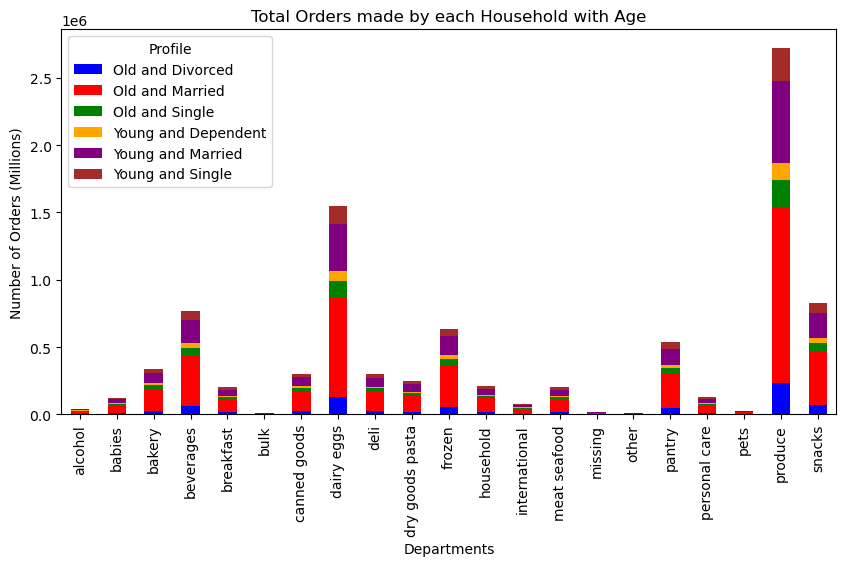

In [236]:
color2 = 'blue', 'red', 'green', 'orange', 'purple', 'brown', 'teal'
Profile_Department_CT = pd.crosstab(small['department'], small['Profile'], dropna = False)
Householdby_Departments_bar = Profile_Department_CT.plot(kind='bar', stacked = True, width=.5, color = color2, figsize = (10,5))

plt.xlabel('Departments')
plt.ylabel('Number of Orders (Millions)')
plt.title('Total Orders made by each Household with Age')

In [237]:
# This code exports the bar chart figure into the Jupyter folder
Householdby_Departments_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Departments by Household Profile Bar Chart.png'))

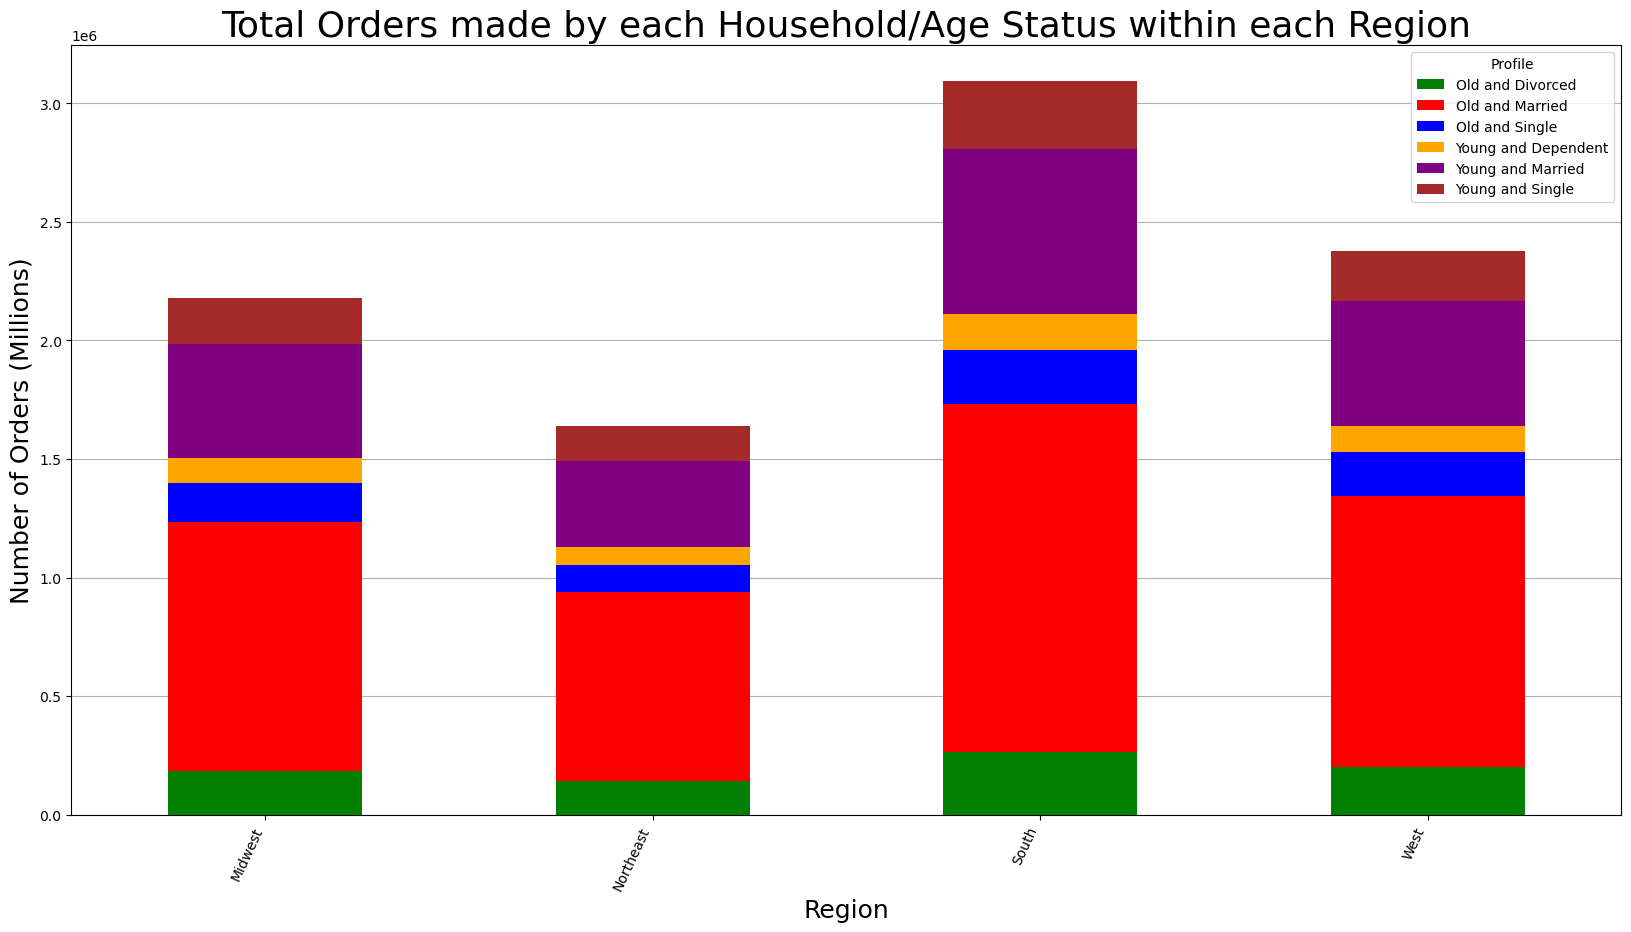

In [261]:
# This creates a bar chart showing the distribution of orders for each Region according to household status with age
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Profile_Region_CT = pd.crosstab(small['Region'], small['Profile'], dropna = False)
Regionby_Profile_bar = Profile_Region_CT.plot(kind='bar', stacked = True, width=.5, color = color3, figsize = (20,10), zorder=3)

plt.xlabel('Region', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Total Orders made by each Household/Age Status within each Region', fontdict={'fontsize' : 26})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=65, ha='right')

plt.show()

### Income Profile by Department and Region

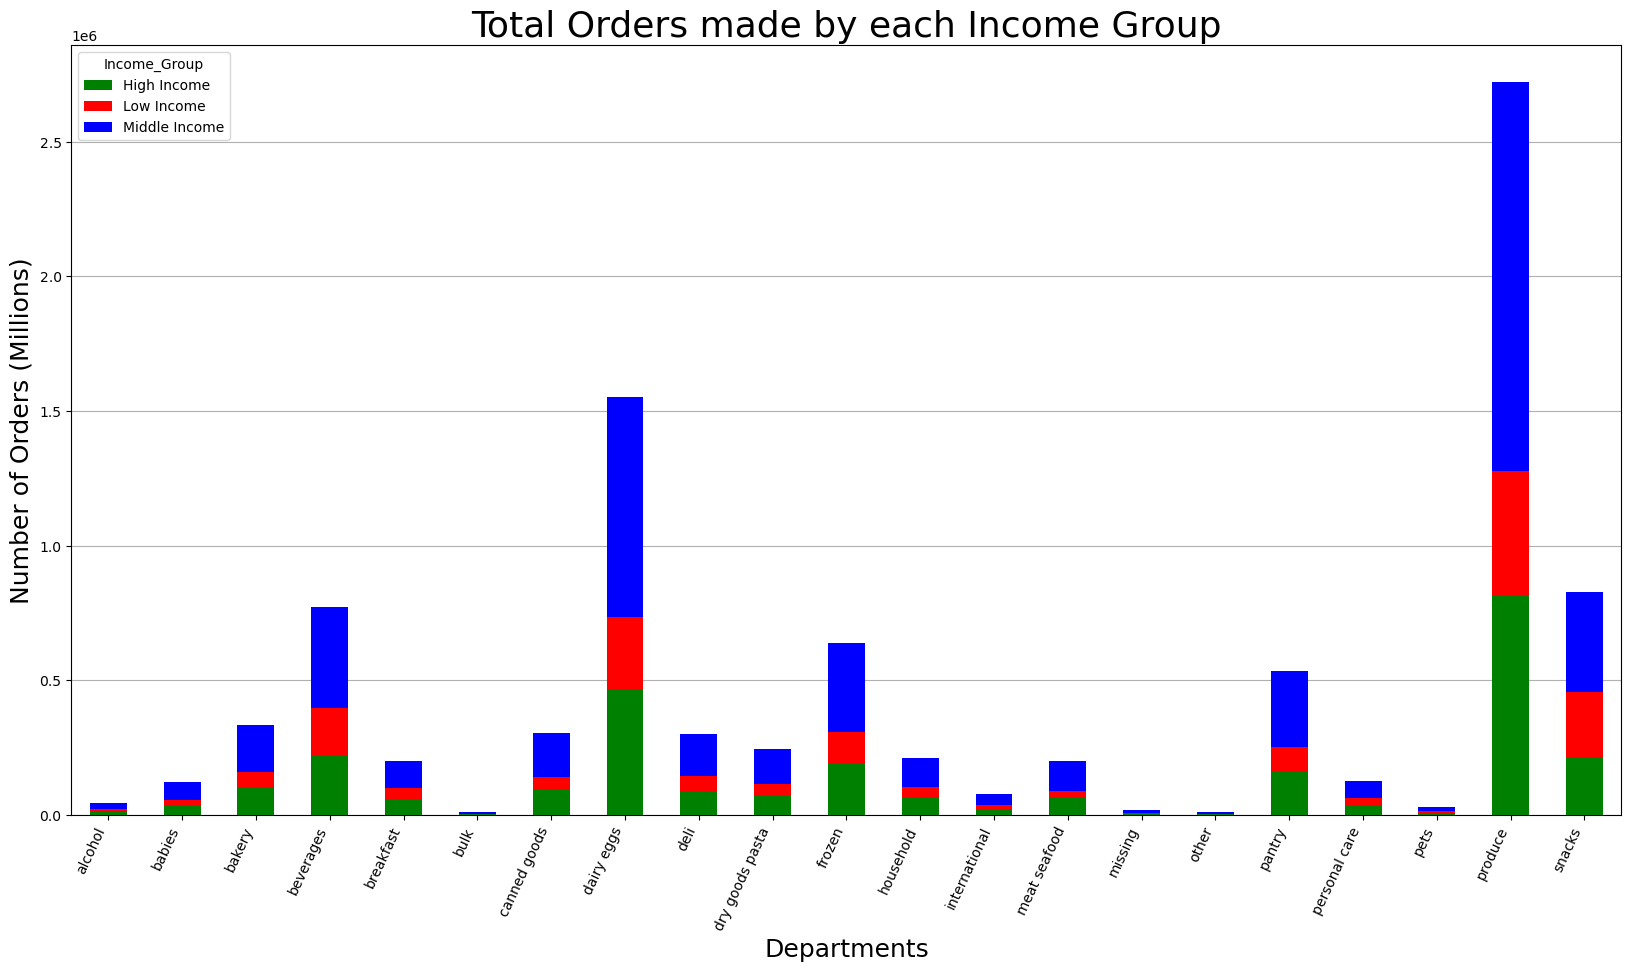

In [219]:
# This creates a bar chart showing the distribution of orders for each department according to income group profiles
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Income_Department_CT = pd.crosstab(small['department'], small['Income_Group'], dropna = False)
Departmentby_Income_bar = Income_Department_CT.plot(kind='bar', stacked = True, width=.5, color = color3, figsize = (20,10), zorder=3)

plt.xlabel('Departments', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Total Orders made by each Income Group', fontdict={'fontsize' : 26})
plt.grid(axis = 'y', zorder=0)
plt.xticks(rotation=65, ha='right')

plt.show()

In [220]:
# This code exports the bar chart figure into the Jupyter folder
Departmentby_Income_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Department Orders by Income Chart.png'))

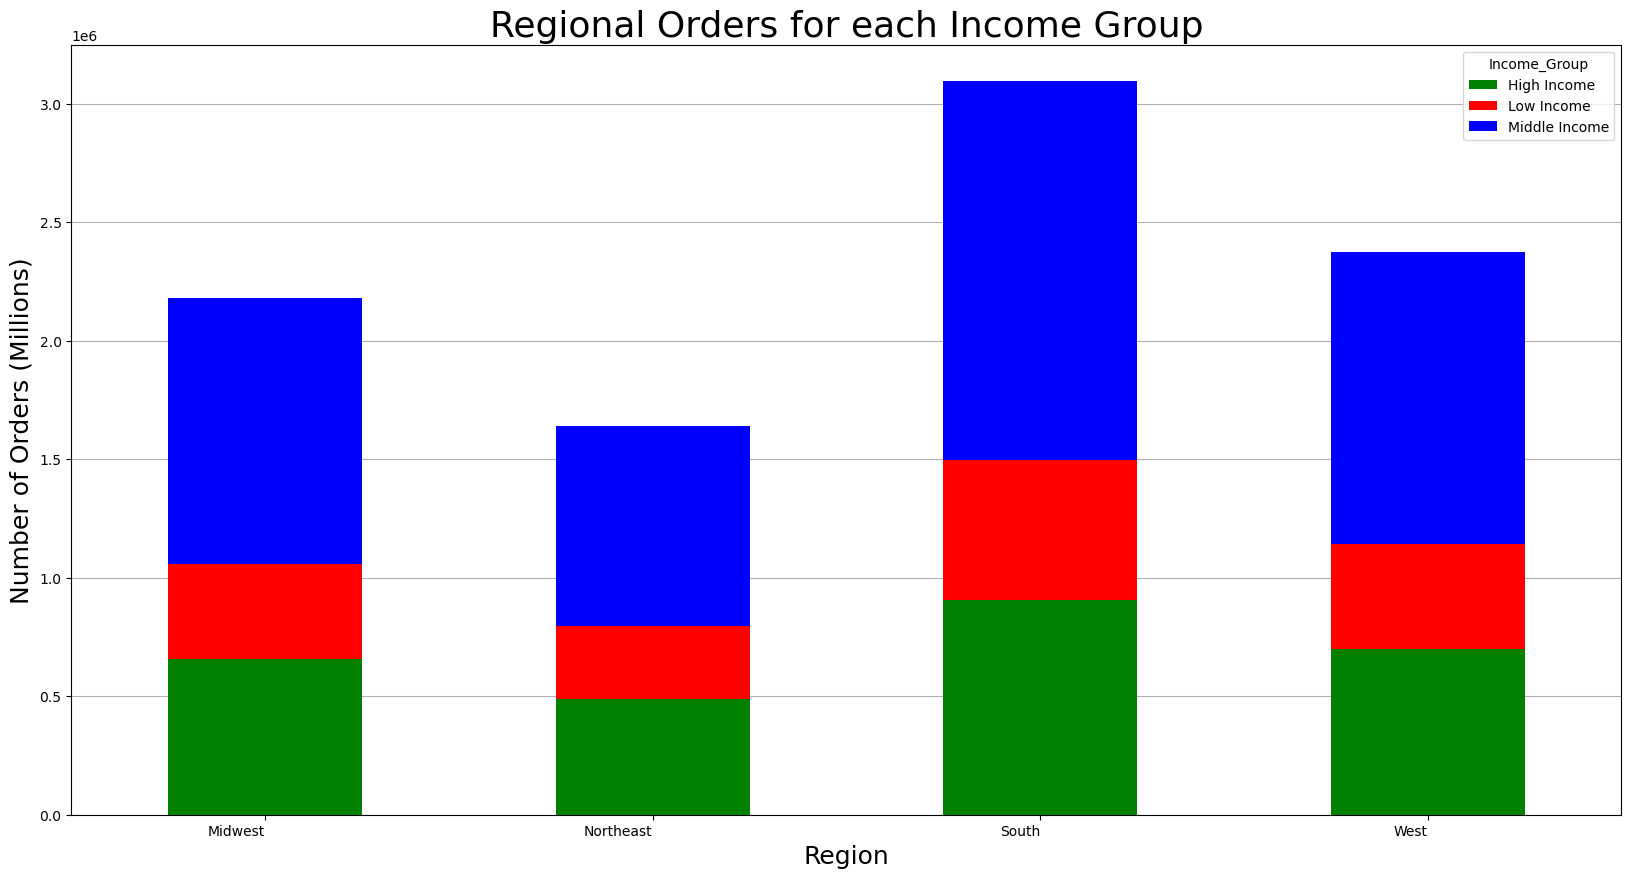

In [222]:
# This code creates a bar chart showing distribution of regional orders based on income groups
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Income_Department_CT = pd.crosstab(small['Region'], small['Income_Group'], dropna = False)
Regionby_Income_bar = Income_Department_CT.plot(kind='bar', stacked = True, width=.5, color = color3, figsize = (20,10), zorder = 3)

plt.grid(axis = 'y', zorder=0)
plt.xlabel('Region', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Regional Orders for each Income Group', fontdict={'fontsize' : 26})
plt.xticks(rotation=0, ha='right')

plt.show()

In [223]:
# This code exports the bar chart figure into the Jupyter folder
Regionby_Income_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Regional Orders by Income Chart.png'))

### Dependants Profile by Department and Region

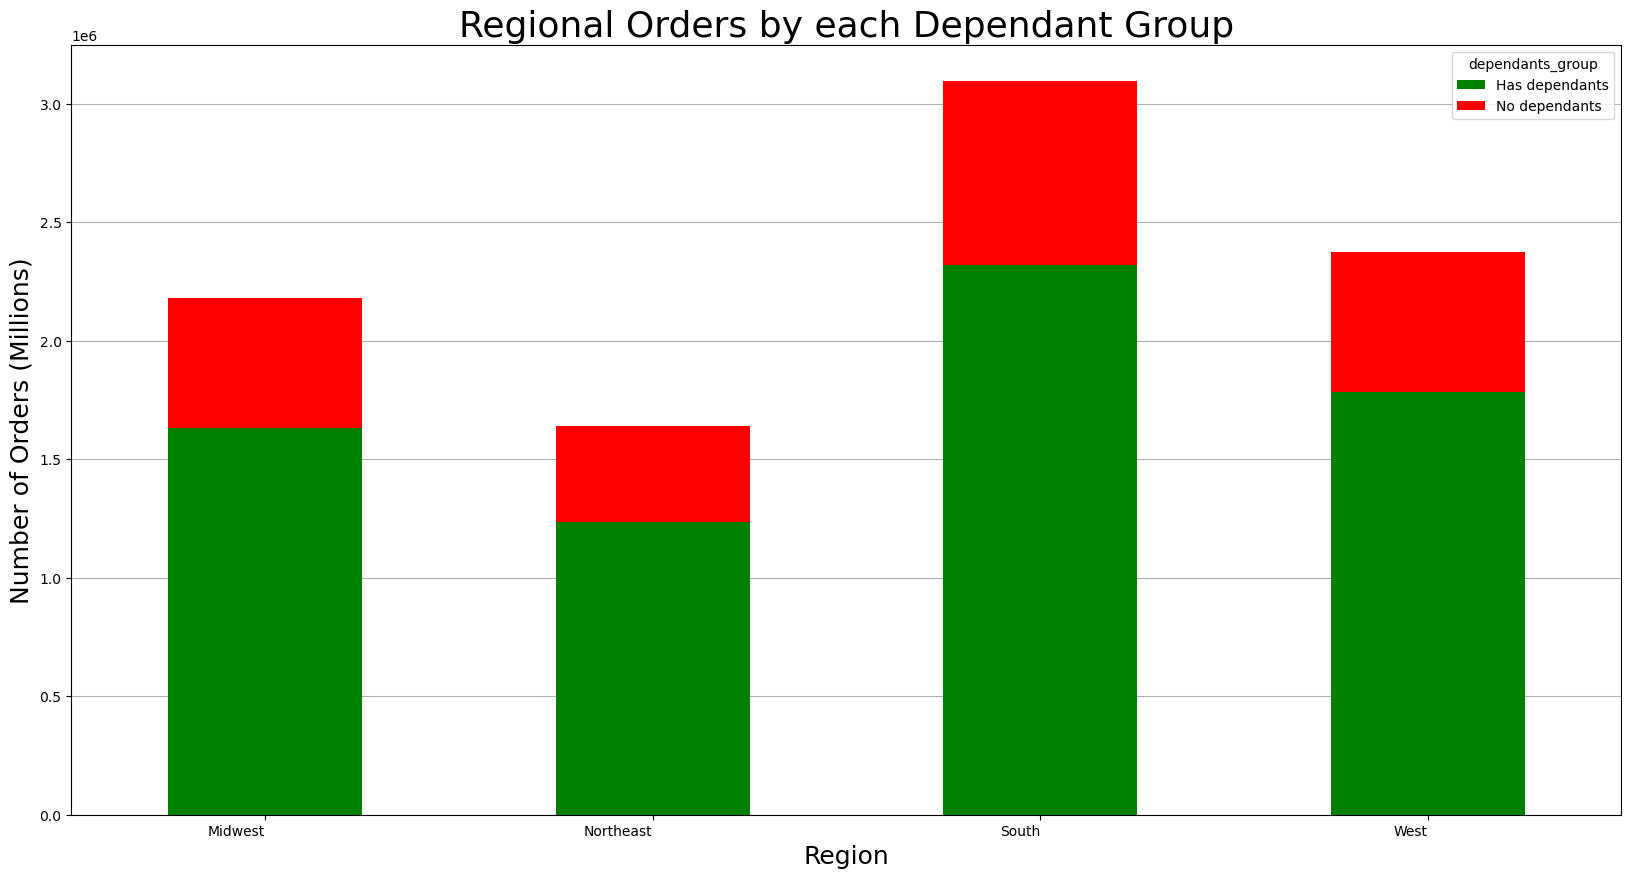

In [226]:
# This code creates a bar chart showing order amounts among groups with and without dependants according to each region
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Dependants_Department_CT = pd.crosstab(small['Region'], small['dependants_group'], dropna = False)
Dependantsby_Region_bar = Dependants_Department_CT.plot(kind='bar', stacked = True, width=.5, color = color3, figsize = (20,10), zorder = 3)

plt.grid(axis = 'y', zorder=0)
plt.xlabel('Region', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Regional Orders by each Dependant Group', fontdict={'fontsize' : 26})
plt.xticks(rotation=0, ha='right')

plt.show()

In [227]:
# This code exports the bar chart figure into the Jupyter folder
Dependantsby_Region_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Dependants by Region Bar Chart.png'))

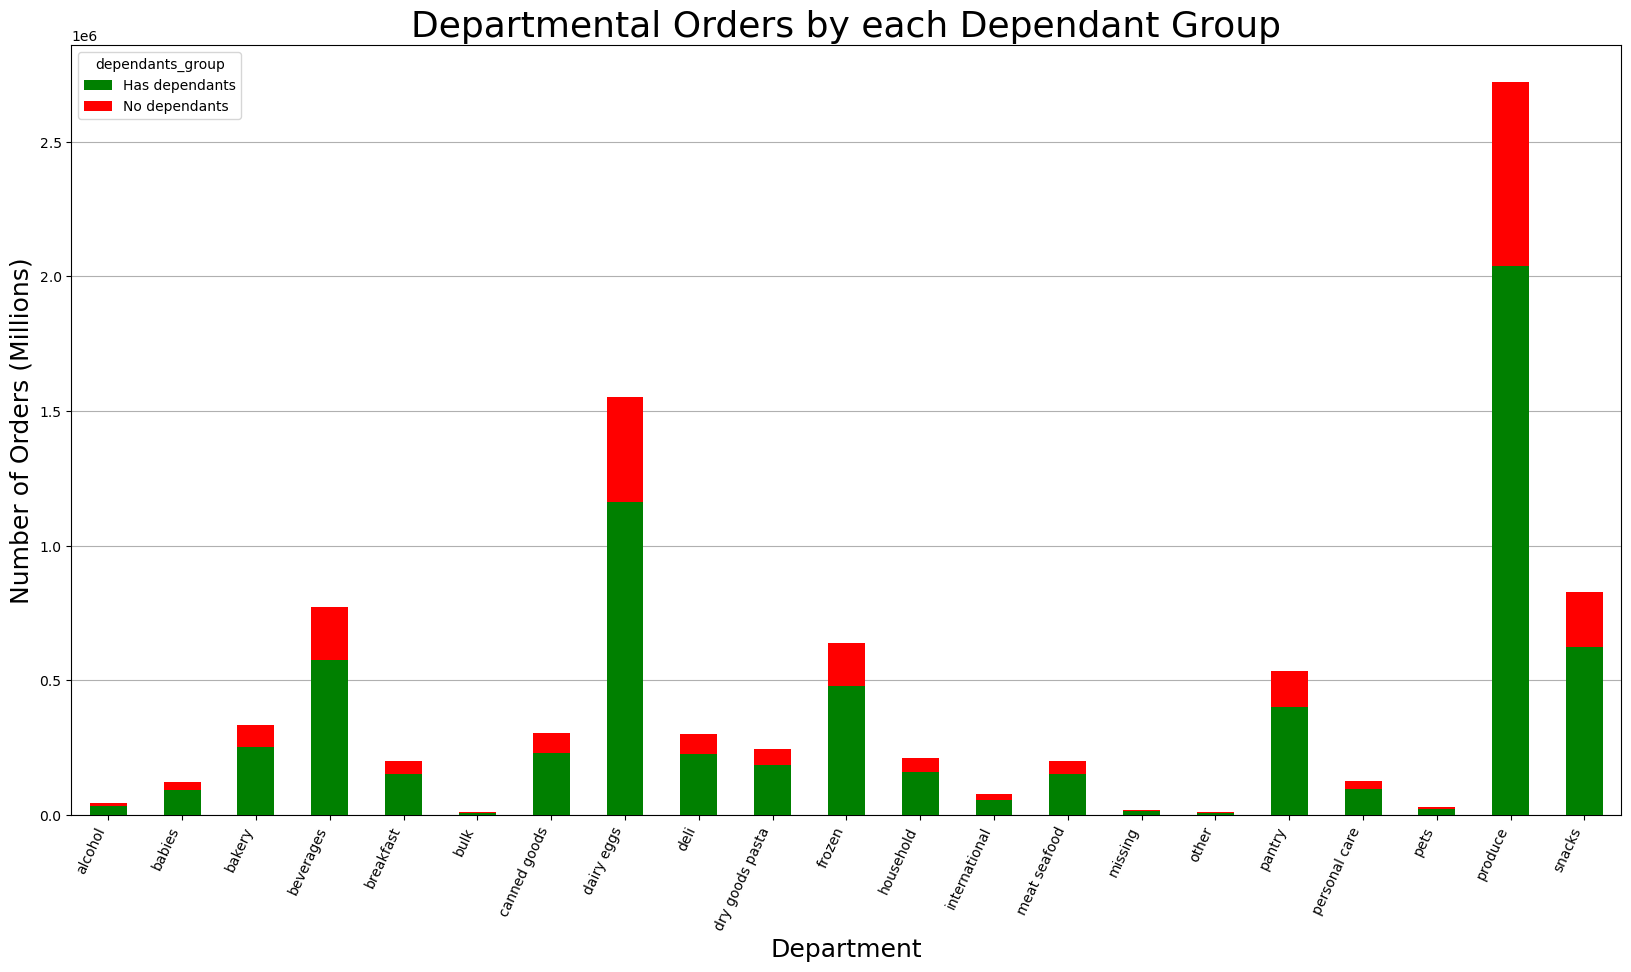

In [230]:
# This code creates a bar chart showing orders based on dependants groups for each department
color3 = 'Green', 'red', 'Blue', 'orange', 'purple', 'brown', 'teal'
Dependants_Department_CT = pd.crosstab(small['department'], small['dependants_group'], dropna = False)
Dependantsby_Department_bar = Dependants_Department_CT.plot(kind='bar', stacked = True, width=.5, color = color3, figsize = (20,10), zorder = 3)

plt.grid(axis = 'y', zorder=0)
plt.xlabel('Department', fontdict={'fontsize' : 18})
plt.ylabel('Number of Orders (Millions)', fontdict={'fontsize' : 18})
plt.title('Departmental Orders by each Dependant Group', fontdict={'fontsize' : 26})
plt.xticks(rotation=65, ha='right')

plt.show()

In [231]:
# This code exports the bar chart figure into the Jupyter folder
Dependantsby_Department_bar.figure.savefig(os.path.join(path3,'Exercise 4.10', '04 Analysis', 'Dependants by Department Bar Chart.png'))

##  Exporting Dataset

In [61]:
# This code exports the final changed dataset into a new file in Data
ords_prods_custs.to_pickle(os.path.join(path3,'Exercise 4.10','02 Data','Profiled Customers Dataset.pkl'))